In [34]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pydotplus
from networkx.drawing.nx_pydot import graphviz_layout
import random
init_notebook_mode(connected=True)
print __version__ # requires version >= 1.9.0

import networkx as nx


2.3.0


In [144]:
G=nx.random_geometric_graph(200,0.125)
pos=nx.get_node_attributes(G,'pos')

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G,ncenter)

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIOrRd',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)
    

In [145]:
tmp = nx.generate_adjlist(G)
for node, adjacencies in enumerate(tmp):
    node_trace['marker']['color'].append(len(adjacencies))
    node_info = '# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

In [146]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

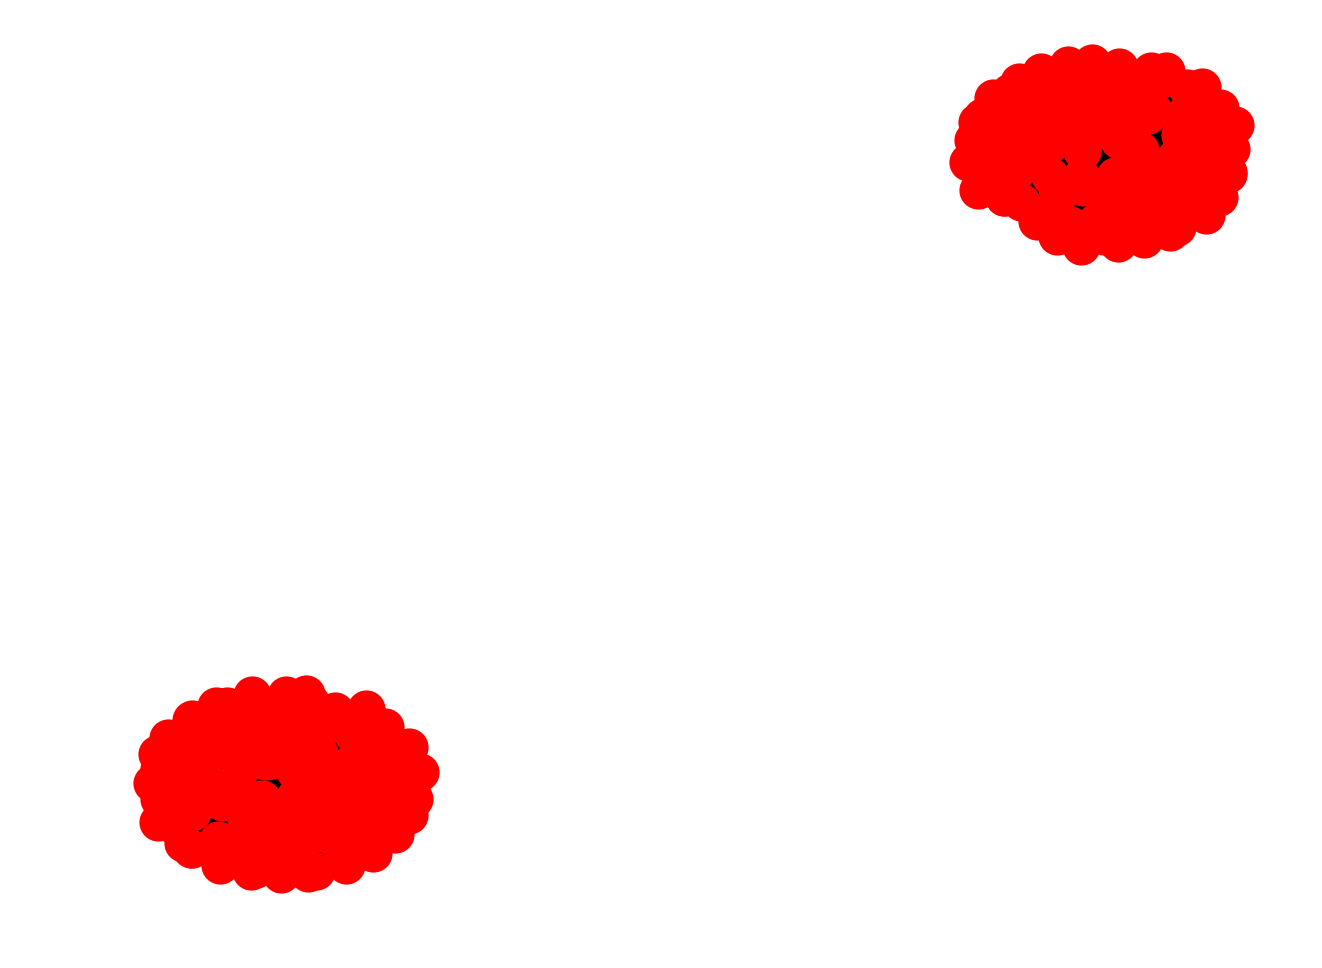

In [155]:
G1=nx.caveman_graph(2,100)
figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
nx.draw_spring(G1, k=0.1)

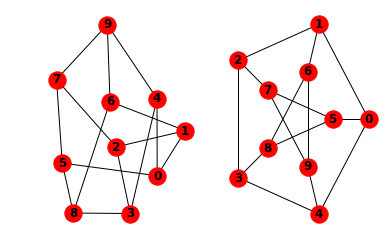

In [108]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

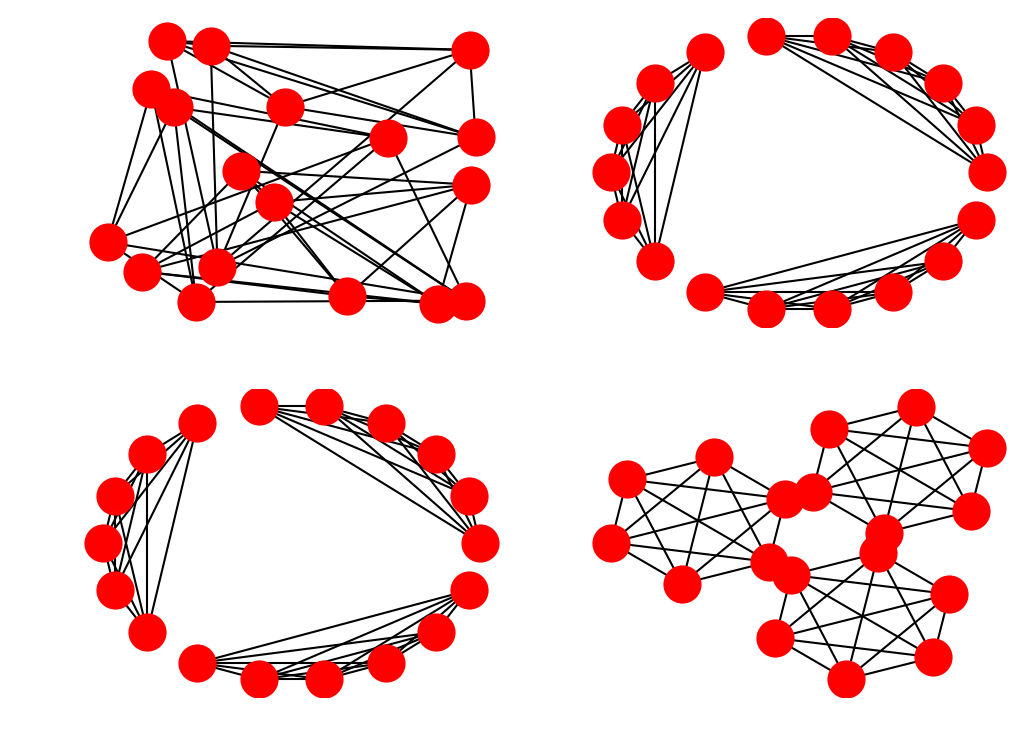

In [110]:
G = nx.caveman_graph(3, 6)
figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G)
plt.subplot(222)
nx.draw_shell(G)
plt.subplot(223)
nx.draw_circular(G)
plt.subplot(224)
nx.draw_kamada_kawai(G)

In [117]:

def printgraph(G, rval=0.25):
    print("Plotting...")
    #plt.figure(figsize=(8,8))
    pos = False
    if not pos:
        #pos=nx.spring_layout(G,iterations=iterations)
        #pos = nx.circular_layout(G)
        #pos=nx.shell_layout(G)
        #pos=nx.random_layout(G)
        #pos=nx.spectral_layout(G)
        pos = graphviz_layout(G, prog='neato', args='')

    edge_color = 'k'
    node_shape = 'o'

    # node color to by type
    node_color = []
    coloring = True
    if coloring:
        for v in G:
            rVal = 0.25
            if random.random() < rval:
                node_color.append('g')
            else:
                node_color.append('r')

    NodeSize=[]
    node_size=100
    if node_size:
        for v in G:
            NodeSize.append(node_size)
    else:
        for v in G:
            NodeSize.append((10*G.degree(v))**(1.0))


    # draw:
    print "Drawing"
    nx.draw(G, pos,
            node_size = NodeSize, 
            node_color = node_color,
            node_shape = node_shape,
            edge_color = edge_color,
            with_labels=False,
            linewidths = 0.0,
            width=0.25)


    #nx.draw_networkx_nodes(self.graph,pos,node_size=NodeSize)
    #nx.draw_networkx_edges(self.graph,pos,alpha=0.4)
    print G.number_of_nodes()
    plt.axis('equal')
    plt.axis('off')
    #filename="images/Network_%d_%s_%d.png"%(G.number_of_nodes(),coloring, curtime)

    #plt.show()
    #plt.savefig(filename)
    plt.show(block=True)

    print G.size()

Plotting...
Drawing
100


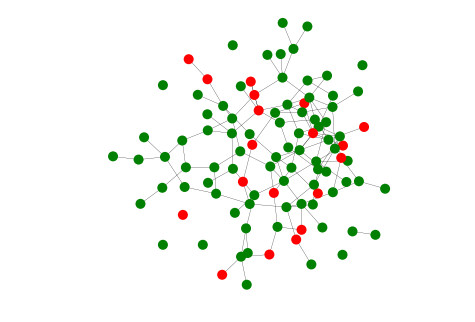

124
Plotting...
Drawing
100


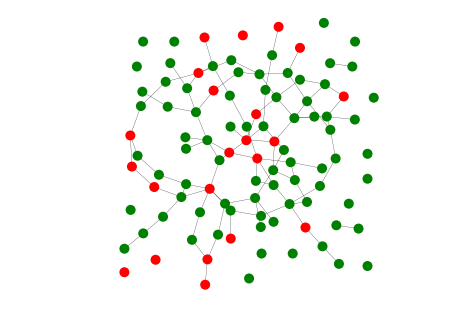

99
Plotting...
Drawing
100


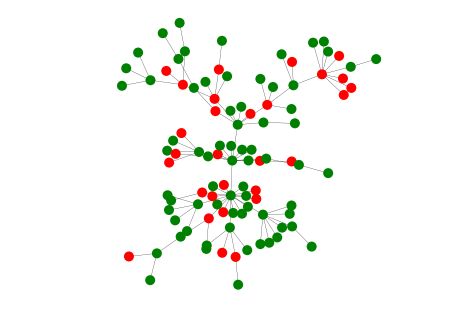

99


In [50]:
G1=nx.fast_gnp_random_graph(100,0.02)
G2=nx.binomial_graph(n=100,p=0.02)
G3=nx.barabasi_albert_graph(100,1)
printgraph(G1)
printgraph(G2)
printgraph(G3)


Plotting...
Drawing
19


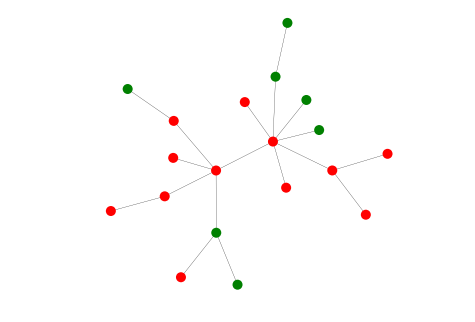

18
Plotting...
Drawing
58


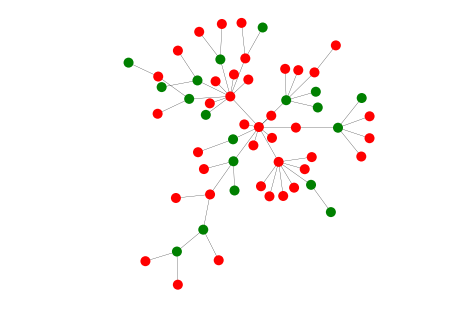

57
Plotting...
Drawing
29


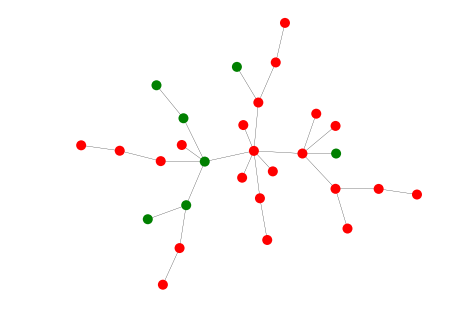

28
Plotting...
Drawing
55


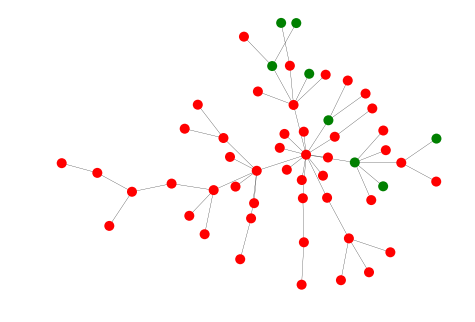

54
Plotting...
Drawing
95


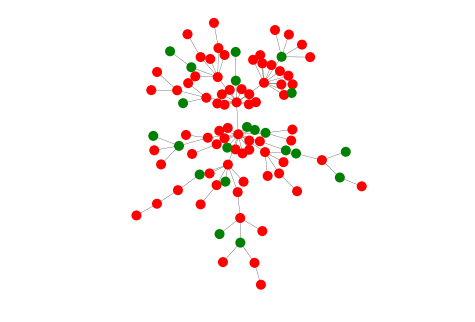

94
Plotting...
Drawing
26


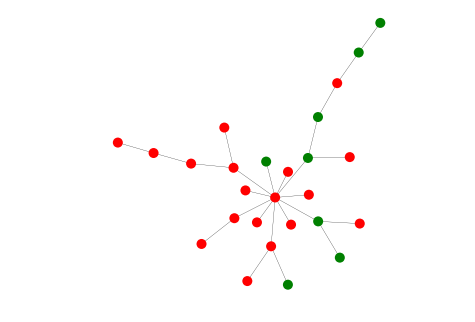

25
Plotting...
Drawing
24


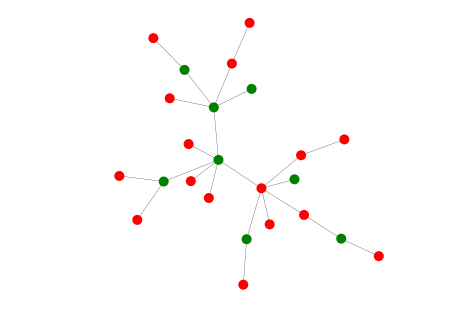

23
Plotting...
Drawing
86


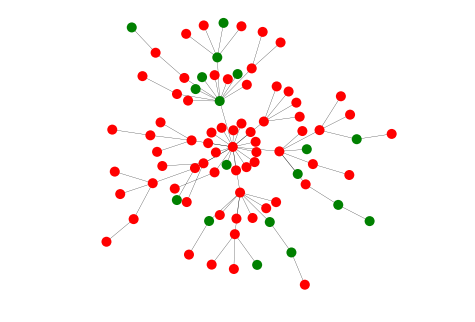

85
Plotting...
Drawing
74


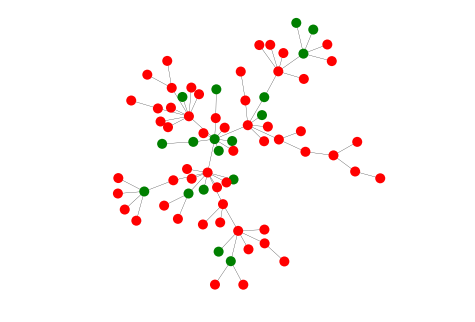

73
Plotting...
Drawing
35


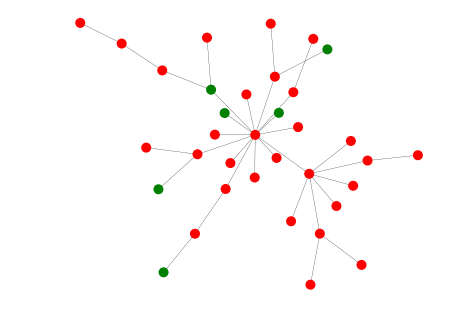

34


In [121]:
#printgraph(nx.powerlaw_cluster_graph(100,1,1.0))
for i in range(10):
    n=random.randrange(5,100)
    printgraph(nx.barabasi_albert_graph(n,1))

Plotting...
Drawing
64


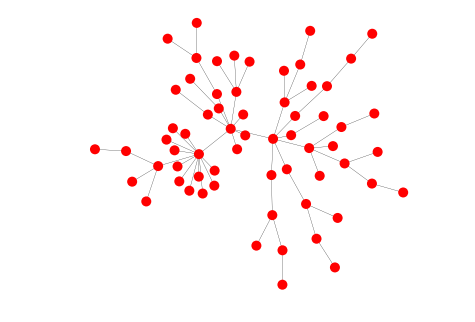

63
Plotting...
Drawing
6


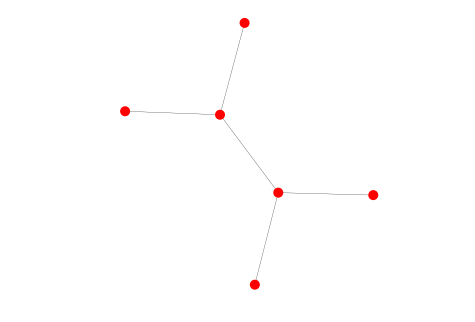

5
Plotting...
Drawing
28


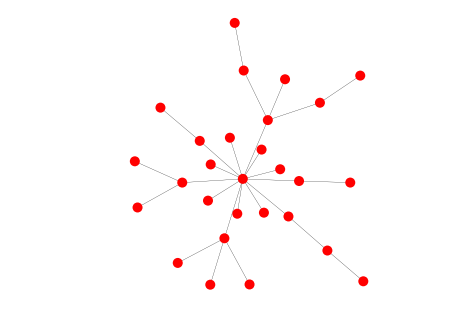

27
Plotting...
Drawing
48


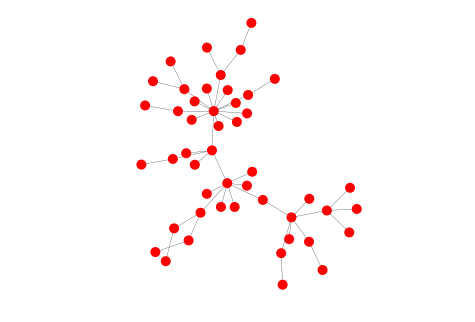

47
Plotting...
Drawing
92


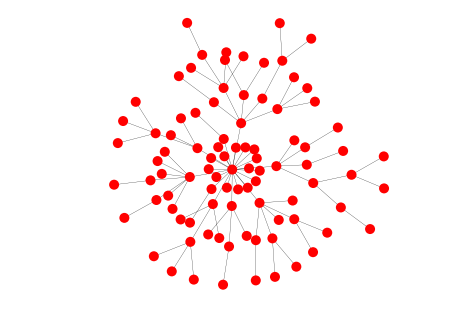

91
Plotting...
Drawing
64


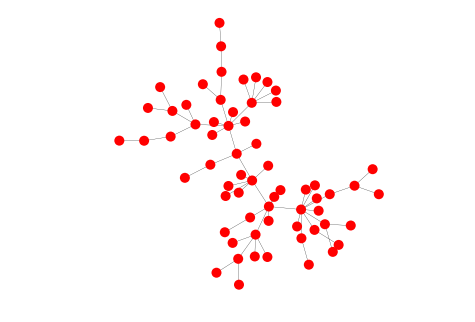

63
Plotting...
Drawing
82


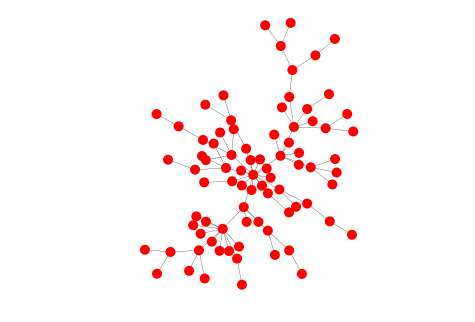

81
Plotting...
Drawing
85


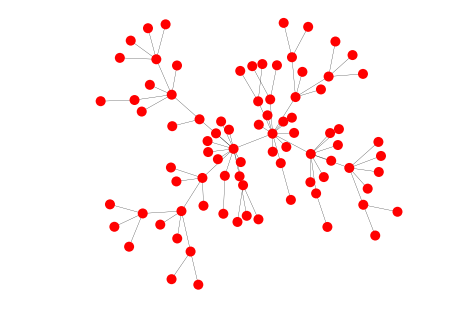

84
Plotting...
Drawing
21


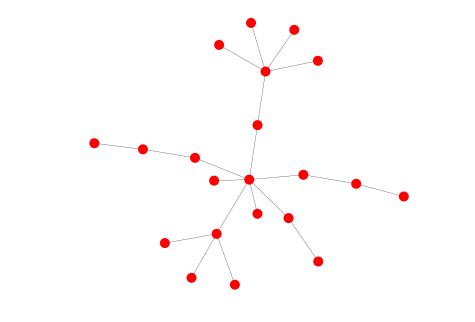

20
Plotting...
Drawing
6


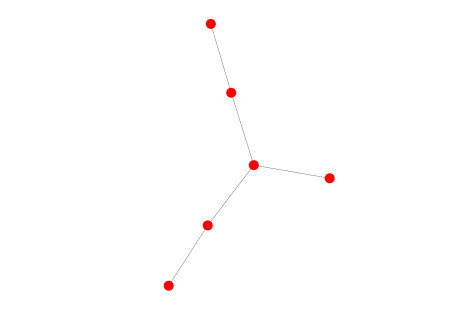

5


In [123]:
for i in range(10):
    n=random.randrange(5,100)
    printgraph(nx.barabasi_albert_graph(n,1), rval=0.0)